In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [2]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [3]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-15 10:50:25,418  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-15 10:50:25,419  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-15 10:50:25,419  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-15 10:50:25,419  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-15 10:50:25,419  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-15 10:50:25,419  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-15 10:50:25,420  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-15 10:50:25,420  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-15 10:50:25,420  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-15 10:50:25,420  | py-experimenter - WARNING  | No values given for keyfield total_time

In [4]:
# Select Row with Minimal Cost
minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = minimal_cost_row["experiment_id"]
minimal_cost_trial = minimal_cost_row["trial_number"]
minimal_cost = minimal_cost_row["cost"]

In [5]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-15 10:50:26,021  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-15 10:50:26,022  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-15 10:50:26,022  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-15 10:50:26,022  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-15 10:50:26,022  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-15 10:50:26,022  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-15 10:50:26,023  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-15 10:50:26,023  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-15 10:50:26,023  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-15 10:50:26,024  | py-experimenter - WARNING  | No values given for keyfield total_time

In [6]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8900,8901,3,2024-07-10 23:42:38,2,39,None,50000,-1.964,0.038781
8901,8902,3,2024-07-10 23:42:38,2,39,None,100000,-1.080,1.120040
8902,8903,3,2024-07-10 23:42:38,2,39,None,150000,-0.869,1.106260
8903,8904,3,2024-07-10 23:42:38,2,39,None,200000,-0.780,1.230020
8904,8905,3,2024-07-10 23:42:39,2,39,None,250000,-0.794,0.972473
...,...,...,...,...,...,...,...,...,...
8995,8996,3,2024-07-10 23:45:59,4,39,None,800000,0.800,0.400000
8996,8997,3,2024-07-10 23:46:00,4,39,None,850000,1.000,0.000000
8997,8998,3,2024-07-10 23:46:00,4,39,None,900000,1.000,0.000000
8998,8999,3,2024-07-10 23:46:00,4,39,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

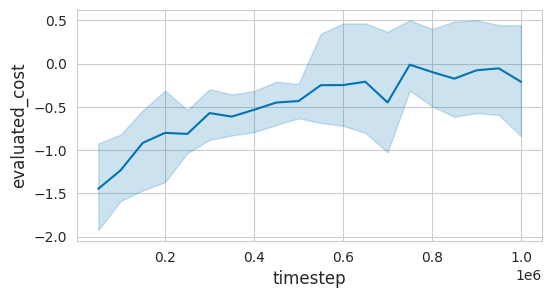

In [7]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

In [8]:
table_name = "net2deeper_grow_once"

In [9]:
smac_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")


2024-07-15 10:50:26,905  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-15 10:50:26,906  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-15 10:50:26,907  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-15 10:50:26,907  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-15 10:50:26,907  | py-experimenter - WARNING  | No values given for keyfield total_time

In [10]:
# select row with minimal cost
minimal_cost_row = smac_cost.loc[smac_cost["cost"].idxmin()]
minimal_cost_experiment_id = minimal_cost_row["experiment_id"]
minimal_cost_trial = minimal_cost_row["trial_number"]
minimal_cost = minimal_cost_row["cost"]


In [11]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-15 10:50:27,435  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-15 10:50:27,436  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-15 10:50:27,436  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-15 10:50:27,436  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-15 10:50:27,437  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

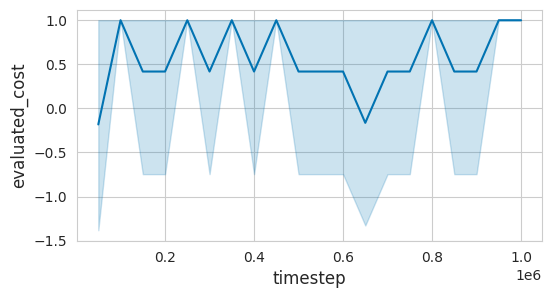

In [12]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-15 10:50:28,165  | py.warnings - WARNING  | /tmp/ipykernel_329918/1892573027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-15 10:50:28,165  | py.warnings - WARNING  | /tmp/ipykernel_329918/1892573027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-15 10:50

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

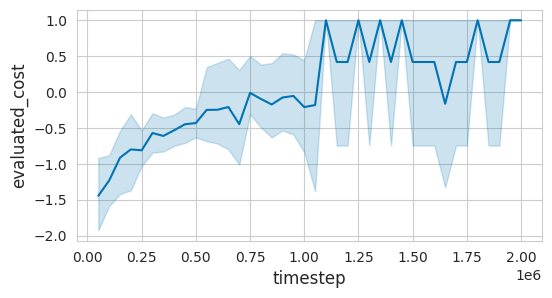

In [13]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined, x="timestep", y="evaluated_cost")